The task is to explore zero shot classification in Transformers.

In [1]:
import pandas as pd
import numpy as np
from transformers import pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score

In [2]:
# load the pipeline
classifier = pipeline('zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
# a text from Wikipedia article: https://en.wikipedia.org/wiki/Neuron
text = 'Most neurons receive signals via the dendrites and soma and send out signals down the axon. ' + \
'At the majority of synapses, signals cross from the axon of one neuron to a dendrite of another. ' + \
'However, synapses can connect an axon to another axon or a dendrite to another dendrite.'
classifier(text, candidate_labels = ['physics', 'technology', 'biology'])

{'sequence': 'Most neurons receive signals via the dendrites and soma and send out signals down the axon. At the majority of synapses, signals cross from the axon of one neuron to a dendrite of another. However, synapses can connect an axon to another axon or a dendrite to another dendrite.',
 'labels': ['biology', 'technology', 'physics'],
 'scores': [0.6764624714851379, 0.2059495449066162, 0.11758799105882645]}

In [4]:
# download BBC text classification dataset
# original dataset on Kaggle: https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification)
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [5]:
# save the dataset in Pandas dataframe
df = pd.read_csv('bbc_text_cls.csv')

In [6]:
df.sample(frac=1).head()

,text,labels
1135,Sport betting rules in spotlight\n\nA group of...,politics
669,iTunes now selling Band Aid song\n\nIpod owner...,entertainment
2208,Beckham virus spotted on the net\n\nVirus writ...,tech
561,Spike Lee backs student directors\n\nFilm-make...,entertainment
1592,Mourinho takes swipe at Arsenal\n\nChelsea bos...,sport


In [7]:
labels = df['labels'].unique()

In [8]:
# get a sample text
print(df.iloc[700]['text'])

Little Britain vies for TV trophy

BBC hits Little Britain and Strictly Come Dancing are among numerous British shows nominated for the prestigious Golden Rose television awards.

Homegrown reality programmes dominated that category, including Channel 4's Supernanny and ITV1's Hell's Kitchen. EastEnders and Coronation Street were overlooked in the soap category, but Doctors and Family Affairs gained nods. The festival, which honours the best TV from around the globe, will take place in Lucerne, Switzerland from 3-8 May.

Little Britain, which is now in its second series, faces competition from BBC Two's The Catherine Tate Show and Sacha Baron Cohen's creations Borat and Bruno. In the separate sitcom category, dark comedy Nighty Night - which began life on BBC Three - will do battle with mainstream BBC One show My Family.

BBC One's Strictly Come Dancing, which saw celebrities compete against each other to become champions of the dancefloor, is among five British nominations in the vari

In [9]:
df.iloc[700]['labels']

'entertainment'

In [10]:
# classify the text using the pipeline
classifier(df.iloc[700]['text'], candidate_labels=labels)

{'sequence': "Little Britain vies for TV trophy\n\nBBC hits Little Britain and Strictly Come Dancing are among numerous British shows nominated for the prestigious Golden Rose television awards.\n\nHomegrown reality programmes dominated that category, including Channel 4's Supernanny and ITV1's Hell's Kitchen. EastEnders and Coronation Street were overlooked in the soap category, but Doctors and Family Affairs gained nods. The festival, which honours the best TV from around the globe, will take place in Lucerne, Switzerland from 3-8 May.\n\nLittle Britain, which is now in its second series, faces competition from BBC Two's The Catherine Tate Show and Sacha Baron Cohen's creations Borat and Bruno. In the separate sitcom category, dark comedy Nighty Night - which began life on BBC Three - will do battle with mainstream BBC One show My Family.\n\nBBC One's Strictly Come Dancing, which saw celebrities compete against each other to become champions of the dancefloor, is among five British n

In [11]:
# calculate accuracy
predictions = classifier(df['text'].tolist(), candidate_labels=labels)

In [12]:
predicted_labels = [d['labels'][0] for d in predictions]

In [13]:
df['predicted_labels'] = predicted_labels

In [14]:
print("Accuracy:", np.mean(df['predicted_labels'] == df['labels']))

Accuracy: 0.5649438202247191


In [15]:
N = len(df)
K = len(labels)
label2idx = {v:k for k, v in enumerate(labels)}

probs = np.zeros((N, K))
for i in range(N):
    d = predictions[i]
    for label, score in zip(d['labels'], d['scores']):
        k = label2idx[label]
        probs[i, k] = score

In [16]:
int_labels = [label2idx[x] for x in df['labels']]

In [17]:
# make a confusion matrix
int_predictions = np.argmax(probs, axis=1)
cm = confusion_matrix(int_labels, int_predictions, normalize='true')

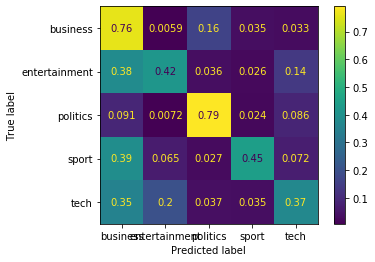

In [18]:
cm_plot = ConfusionMatrixDisplay(cm, display_labels=labels)
cm_plot.plot()

In [19]:
# calculate F1 score and AUC
f1_score(df['labels'], predicted_labels, average='micro')

0.5649438202247191

In [20]:
roc_auc_score(int_labels, probs, multi_class='ovo')

0.8853273055825154